## Exercise 13-9

Write a program that reads a text from a file, counts word frequencies, and prints one
line for each word, in descending order of frequency, with log f and log r.


To solve the listed problem, I will need some functions I have written before, 

+ Word histogram 
+ Process file 
+ Process line 
+ mostcommon


## Word Histogram

Word histogram is a function that reads a file and builds a histogram from it. The histogram is a dictionery of words and frequency in file. The keys are the word and values are the frequency

In [7]:
function processfile(filename)
    hist = Dict()
    for line in eachline(filename)
        processline(line, hist) 
    end
    return hist
end;

function processline(line, hist)
    line = replace(line, '-' => ' ')
    for word in split(line)
        word = string(filter(isletter, [word...])...)
        word = lowercase(word)
        hist[word] = get!(hist, word, 0) + 1
    end
end;

In [8]:
filename = "Shakespeare.txt"
hist = processfile(filename)

Dict{Any, Any} with 27732 entries:
  "baleful"      => 7
  "oblique"      => 1
  "ungoverned"   => 4
  "wentand"      => 1
  "frowning"     => 17
  "gout"         => 8
  "propositions" => 1
  "henry"        => 627
  "barkd"        => 1
  "tameness"     => 2
  "entomb"       => 3
  "rises"        => 25
  "redresses"    => 2
  "unwholesome"  => 10
  "progression"  => 1
  "stirrers"     => 1
  "tribunal"     => 2
  "il"           => 14
  "knots"        => 9
  ⋮              => ⋮

In [12]:
function mostcommon(hist)
    t = []
    for (key, value) in hist 
        push!(t, (value, key))
    end
    t = reverse(sort(t))
    return t
end

mostcommon (generic function with 1 method)

In [38]:
freq = mostcommon(hist)

27732-element Vector{Any}:
 (30550, "the")
 (28519, "and")
 (22134, "i")
 (21045, "to")
 (18865, "of")
 (16509, "a")
 (14436, "you")
 (13187, "my")
 (12483, "in")
 (11806, "that")
 ⋮
 (1, "abbots")
 (1, "abbeys")
 (1, "abates")
 (1, "abatements")
 (1, "abashd")
 (1, "abandonwhich")
 (1, "abandoner")
 (1, "abaissiez")
 (1, "aarons")

In [102]:
function rank(Freq)
    array = []
    println("The most words are listed below: ")
    counter = 1
    println("Word", "\t", "Freq", "\t", "Rank", "\t", "Logf", "\t\t", "Logr")
    for (freq, word) in Freq[1:10] 
        logf = round(log(freq), digits=4)
        logr = round(log(counter), digits=4)
        println(word, "\t", freq, "\t", counter, "\t", logf, "\t\t", logr)
        push!(array, (logf, logr))
        counter +=1
    end
    return array
end

rank (generic function with 1 method)

In [103]:
Array = rank(freq);

The most words are listed below: 
Word	Freq	Rank	Logf		Logr
the	30550	1	10.3271		0.0
and	28519	2	10.2583		0.6931
i	22134	3	10.0049		1.0986
to	21045	4	9.9544		1.3863
of	18865	5	9.8451		1.6094
a	16509	6	9.7117		1.7918
you	14436	7	9.5775		1.9459
my	13187	8	9.487		2.0794
in	12483	9	9.4321		2.1972
that	11806	10	9.3764		2.3026


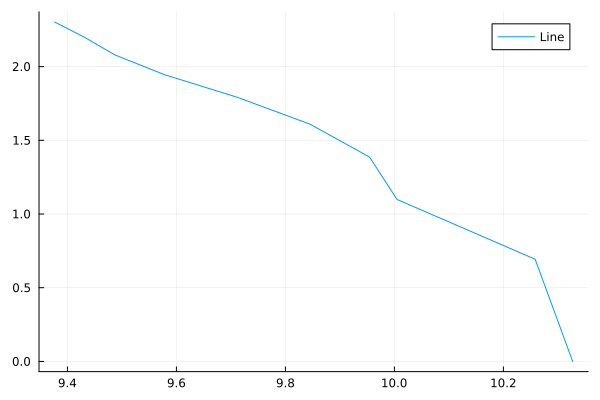

In [104]:
using Plots
gr()

x = first.(Array)
y = last.(Array)

plot(x, y, label = "Line")